# APS1070
#### Project 1 --- Basic Principles and Models 
**Deadline: Jun 4, 11PM - 10 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: **Jigme Tsering**  *(here and elsewhere, please replace the underscore with your answer)*

Student ID: **1007441975**

##**Marking Scheme:**

This project is worth **10 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings. 

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).




### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858 



# Project 1 [10 Marks] 
Let's apply the tools we have learned in Tutorial 1 to a new dataset.

We're going to work with a breast cancer dataset. Download it using the cell below:

In [ ]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

In [ ]:

import pandas as pd
df = pd.DataFrame(dataset['data'],columns=dataset['feature_names']) # forming a data frame from dataset
print("NO of features in this dataset : ",len(df.columns))
print("No of obsearvations that have a 'mean area' > 700 : ",len(df.loc[df['mean area']>700,['mean area']]))
df['target']=dataset['target'] # adding column 'target' to data frame
target_names=dataset['target_names'].tolist()
print("Target Names are :",target_names) # printing target_names from the data set
print("index of malignant: ",target_names.index('malignant')," and index of benign: ", target_names.index('benign'))
print("No of participants that tested Malignant: ",len(df.loc[df['target']==0,['target']]))
print("NO of participants that tested Benign : ", len(df.loc[df['target']==1,['target']]))
print("Total number of rows: ",df.shape[0])


NO of features in this dataset :  30
No of obsearvations that have a 'mean area' > 700 :  171
Target Names are : ['malignant', 'benign']
index of malignant:  0  and index of benign:  1
No of participants that tested Malignant:  212
NO of participants that tested Benign :  357
Total number of rows:  569


## Part 1: Getting started [2 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[0.4]**
* How many features do we have in this dataset? **30**
* How many observations have a 'mean area' of greater than 700? **171**
* How many participants tested `Malignant`? **212**
* How many participants tested `Benign`? **357**

### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.) 

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

In [ ]:
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split
columns=df.columns.tolist();
X=df[columns[0:30]]
Y=df[['target']] # if i only pass string it would give me series
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.3,random_state=0)

### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is ``worst smoothness``, the y-axis is ``worst fractal dimension,`` and the color of each datapoint indicates its class.  **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. Standardize the data and plot those features again. What's different? Based on your observation, what is the advantage of standardization? **[0.6]**




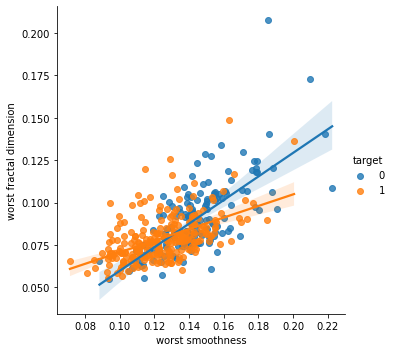

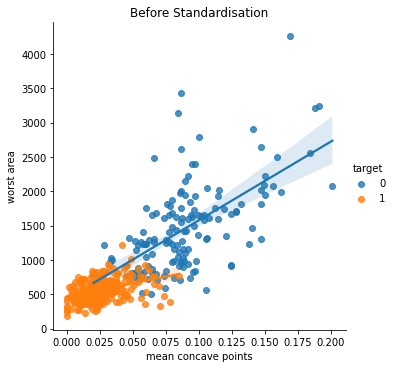

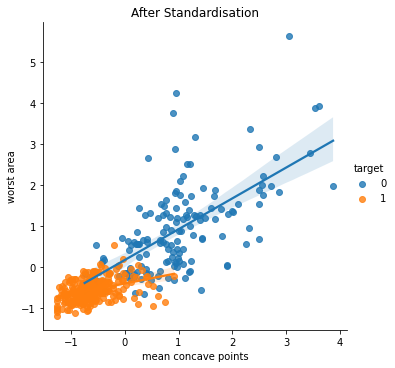

In [ ]:
### YOUR CODE HERE ###
import seaborn as sns
import matplotlib.pyplot as plt 
train_data=Xtrain.copy() # training set that contains only features values
train_data['target']=Ytrain.target.values # adding target values to it 
sns.lmplot(x="worst smoothness", y="worst fractal dimension", hue="target",data=train_data)

sns.lmplot(x="mean concave points", y="worst area", hue="target",data=train_data) # mean concave points are in order of 10^-1 and worst area in 10^2 
ax = plt.gca()
ax.set_title("Before Standardisation")

from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
scaler2.fit(Xtrain)
train_Data_2=scaler2.transform(Xtrain) # returns numpy array
train_Data3=pd.DataFrame(train_Data_2,columns=columns[0:30])
train_Data3['target']=Ytrain.target.values

sns.lmplot(x="mean concave points", y="worst area", hue="target",data=train_Data3)
ax = plt.gca()
ax.set_title("After Standardisation")
# Show the plot
plt.show()


**No changes was observed before and after standartisation. It is due to the fact that standardisation doesn't change the data but only it's scale.** 

**However,** **it brought worst area and mean concave points to a similar scale. This is very useful and crucial if both of these variables are present in the objective function of the machine learning model, so that one doesn't dominate others by simply being bigger in magnitude.**



## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a malignant or benign tumor. 

Follow these steps: 

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? What is the highest cross-validation accuracy? **[0.5]**
3. Comment on  which ranges of `k` lead to underfitted or overfitted models (hint: compare training and validation curves!). **[0.5]**




In [ ]:
### YOUR CODE HERE ###

the highest cross validation accuracy is : 0.9346518987341772
Therefore, the best k is:  10
And at k=  10  train score is = 0.9340391553794287


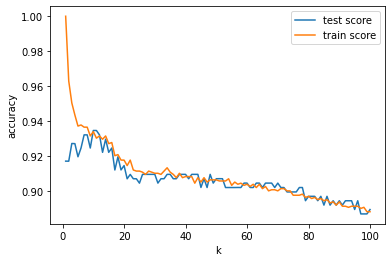

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn import neighbors
import warnings
warnings.filterwarnings('ignore')
test_score_list=[]
train_score_list=[]
for i in range(1,101):
  knn = neighbors.KNeighborsClassifier(n_neighbors=i)
  scores = cross_validate(knn, Xtrain, Ytrain, cv=5, return_train_score=True)
  test_score_list.append(scores['test_score'].mean())
  train_score_list.append(scores['train_score'].mean())
plt.plot(range(1,101),test_score_list)
plt.plot(range(1,101),train_score_list)
plt.legend(["test score", "train score"])
plt.xlabel('k')
plt.ylabel('accuracy')
print("the highest cross validation accuracy is :",test_score_list[test_score_list.index(max(test_score_list))] )
#print("Therefore, the best k is: ",2*(test_score_list.index(max(test_score_list))+1)+1)
print("Therefore, the best k is: ",test_score_list.index(max(test_score_list))+1)
print("And at k= ",test_score_list.index(max(test_score_list))+1," train score is =",train_score_list[test_score_list.index(max(test_score_list))] )



**From the plot it is seen that** 

**1. for k<10,train score grows and reaches 100% around k=1 , while test score drops. therefore it overfits in this region**

**2. for k>10, both test score and train score drops leading to underfitting** 


## Part 3: Feature Selection [3 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy. 
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!. 

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use [this link](https://machinelearningmastery.com/calculate-feature-importance-with-python/
) to get familiar with extracting the feature impotance order of machine learning algorithms in Python.

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to repeat the process and remove another feature.


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: **[1]**
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Removes the least important feature based on step 2. 
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score, the corresponding `k` (number of neighbours) value, and the removed feature in three lists.
6. Repeat Steps 3-5 until you meet the stop condition (step 7). 
 
7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, the list of corresponding mean cross-validation accuracies, and the list of `k` values when a feature was removed (i.e., the lists that were appended to in Step 5).

* Visualize your results by plotting the best mean cross-validation accuracy (based on the best value of `k`) on y axis vs. the number of features (x axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[0.5]**

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  **[0.5]**

* State what is the number of essential features for classification and justify your answer. **[1]**
  
  







 

You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order. 
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


In [ ]:
###def Feature_selector (X_train , y_train , tr=0.95):
### YOUR CODE HERE ###
  ###return ______

In [ ]:
from sklearn import tree
import numpy as np
Xtrain_2=Xtrain.copy()
Ytrain_2=Ytrain.copy()
def Feature_selector(Xtrain_f,Ytrain_f,tr=0.95):
  best_mean_cross_validation_score=[] # list that stores maximum cross validation score for particular k
  best_k=[] # corresponding k
  removed_features=[] # list of features that are removed
  No_feature_remain_list=[] # list of no of remaining features
  l=0
  while True:
    l=l+1
    #print("iteration :",l)
    No_feature_remain_list.append(len(Xtrain_f.columns))
    #print(len(Xtrain_f.columns))

    dt = tree.DecisionTreeClassifier()
    dt.fit(Xtrain_f,Ytrain_f)
    importance = dt.feature_importances_

    test_score_list1=[]
    train_score_list1=[]
    for i in range(1,101):
      knn = neighbors.KNeighborsClassifier(n_neighbors=i)
      scores = cross_validate(knn, Xtrain_f, Ytrain_f, cv=5, return_train_score=True)
      test_score_list1.append(scores['test_score'].mean())
      train_score_list1.append(scores['train_score'].mean())
    
    importance_list_least_importance=np.where(importance==min(importance)) # returns tuple of array contaiining index of least importanct features
    index_minimum=importance_list_least_importance[0].tolist() # converting the tuple of indexes into list
    remove_column=Xtrain_f.columns[index_minimum[0]] # column to be removed
    Xtrain_f.drop(remove_column, axis = 1, inplace = True) # removing column

    best_mean_cross_validation_score.append(test_score_list1[test_score_list1.index(max(test_score_list1))])
    best_k.append(test_score_list1.index(max(test_score_list1))+1)
    removed_features.append(remove_column)

    #print(test_score_list1[test_score_list1.index(max(test_score_list1))])

    if len(Xtrain_f.columns)<2 or test_score_list1[test_score_list1.index(max(test_score_list1))]<tr*test_score_list[test_score_list.index(max(test_score_list))]:
      return best_mean_cross_validation_score,best_k,removed_features,l,No_feature_remain_list
      break

In [ ]:
best_scor,best_k,rm_features,total_no_iteration,No_feature_list=Feature_selector(Xtrain.copy(),Ytrain.copy(),tr=0.95)

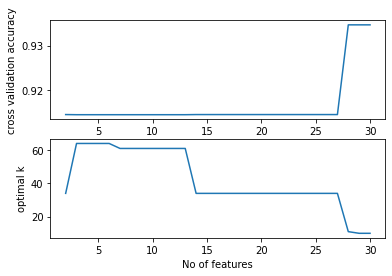

In [ ]:
figure, axis = plt.subplots(2)
  
axis[0].plot(No_feature_list,best_scor)
axis[0].set_xlabel('No of features')
axis[0].set_ylabel('cross validation accuracy')

axis[1].plot(No_feature_list,best_k)
axis[1].set_xlabel('No of features')
axis[1].set_ylabel('optimal k')

plt.show()

**Based on the above two plots, the number of essential features required for classification is around 27 to 30 because at those numbers cross validation accuracy is maximum and number of neighbours(k values) required is among the lowest.**

## Part 4: Standardization [1 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one. 

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalers (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but the model should still work well enough.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)) 

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 95\%. 
 * Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?)


In [ ]:
### YOUR CODE HERE ###

from sklearn.preprocessing import StandardScaler

# copying the splitted data so that original splitted remains untouched and preserved
Xtrain_4=Xtrain.copy()
Xtest_4=Xtest.copy()
Ytrain_4=Ytrain.copy()
Ytest_4=Ytest.copy()


scaler4 = StandardScaler()
scaler4.fit(Xtrain_4)
train_Data_4=scaler4.transform(Xtrain_4) # returns numpy array
train_Data4=pd.DataFrame(train_Data_2,columns=columns[0:30]) # converting it to pandas data frame
test_Data4_4=scaler4.transform(Xtest_4)
test_Data4=pd.DataFrame(test_Data4_4,columns=columns[0:30])






In [21]:
best_scor_scaled,best_k_scaled,rm_features_scaled,l_scaled,No_feature_list_scaled=Feature_selector(train_Data4.copy(),Ytrain_4,tr=0.95)

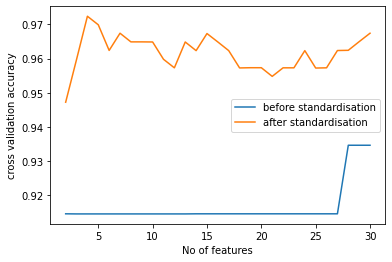

In [22]:
plt.plot(No_feature_list,best_scor)
plt.plot(No_feature_list_scaled,best_scor_scaled)
plt.legend(["before standardisation", "after standardisation"])
plt.xlabel('No of features')
plt.ylabel('cross validation accuracy')

plt.show()

In [41]:
print("1. Before standardisation:")
print('Best no of features: ',No_feature_list[best_scor.index(max(best_scor))],' and the cross validation accuracy =',max(best_scor))
print('Optimal k :', best_k[best_scor.index(max(best_scor))])
print("")
print("")
print("")
print("2. After standardisation:")
print('Best no of features: ',No_feature_list_scaled[best_scor_scaled.index(max(best_scor_scaled))],' and the cross validation accuracy =',max(best_scor_scaled))
print('Optimal k :', best_k_scaled[best_scor_scaled.index(max(best_scor_scaled))])
index=best_scor_scaled.index(max(best_scor_scaled))
c=Xtrain.columns.tolist()
d=list(set(c)-set(rm_features_scaled[0:index]))
print("features that lead to highest cross validation accuracy is: ",d)



1. Before standardisation:
Best no of features:  30  and the cross validation accuracy = 0.9346518987341772
Optimal k : 10



2. After standardisation:
Best no of features:  4  and the cross validation accuracy = 0.9724050632911393
Optimal k : 22
features that lead to highest cross validation accuracy is:  ['area error', 'worst texture', 'worst radius', 'worst concave points']




**1. From the plot above it is seen that cross validation accuracy of standarised data set is higher than original data set for all number of features. So, standarising my data set has improved my model's performance based on cross validation accuracy.**

**2. Highest cross validation accuracy using original data set is lower than that of standarised data set.**

**3.The number of features, value of k and the features that led to highest cross validation accuracy is printed above**




## Part 5: Decision Tree Classifier [1.5 Mark]

Train a decision tree classifier on the standardized dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and check the example there.) Tune the `max_depth` and `min_samples_split` parameters of the tree using cross-validation (CV).
 * Compare the decision tree's performance (mean CV score) with KNN, both using all the features. 


In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
def tree_hyperparameter_tuner(min_depth_value,max_depth_value,min_split_value,max_split_value):
 
  sum_a=np.zeros((max_depth_value-min_depth_value+1, max_split_value-min_split_value+1))
  for k in range(1,20):
    #print(k)
    a = np.zeros((max_depth_value-min_depth_value+1, max_split_value-min_split_value+1))
    I=0
    for i in range(min_depth_value,max_depth_value+1):
      J=0
      for j in range(min_split_value,max_split_value+1): 
        model_tree = DecisionTreeClassifier(max_depth=i,min_samples_split=j)
        scores = cross_validate(model_tree, train_Data4,Ytrain_4 , cv=5, return_train_score=True)
        a[I,J]=scores['test_score'].mean()
        J=J+1
      I=I+1
    sum_a=sum_a+a
  average_score=sum_a/len(range(1,20))
  score_max=np.amax(average_score)
  optimal_indexes=np.unravel_index(np.argmax(average_score),average_score.shape)
  optimal_max_depth=optimal_indexes[0]+min_depth_value
  optimal_min_split=optimal_indexes[1]+min_split_value
  return average_score,score_max ,optimal_max_depth,optimal_min_split





In [ ]:
score_1,score_max1,max_depth_1,min_split_1=tree_hyperparameter_tuner(2,40,2,40)

In [ ]:
print("max accuracy:",score_max1)
print("optimal max-depth",max_depth_1)
print("optimal min_split:",min_split_1)





max accuracy: 0.9244703530979346
optimal max-depth 5
optimal min_split: 8


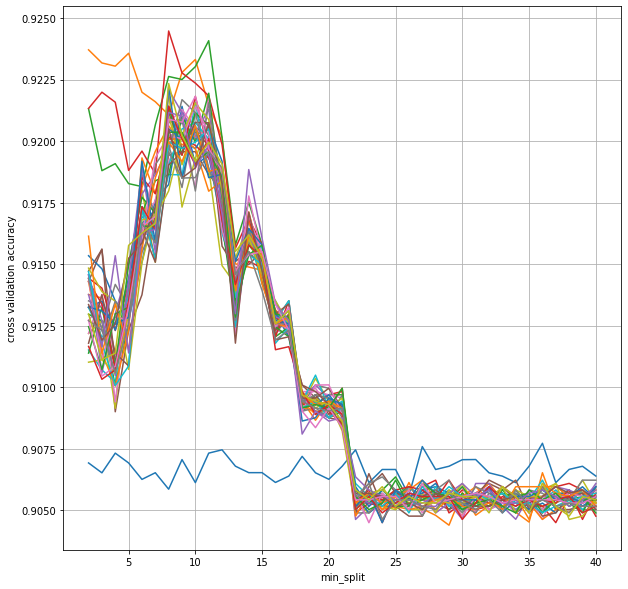

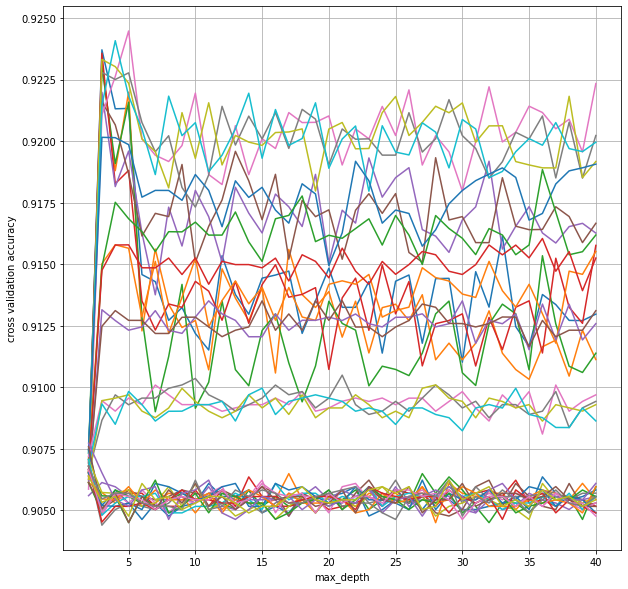

In [ ]:
plt.figure(figsize=(10,10))
for i in range(0,len(score_1)):
  plt.plot( range(2,41),score_1[i,:])
  plt.xlabel('min_split')
  plt.ylabel('cross validation accuracy')
plt.grid()
plt.show()

plt.figure(figsize=(10,10))
for i in range(0,len(score_1)):
  plt.plot( range(2,41),score_1[:,i])
  plt.xlabel('max_depth')
  plt.ylabel('cross validation accuracy')
plt.grid()
plt.show()


  


**Observation from the plots:**

**1. the optimal min_split is occuring around 10.**

**2. the optimal max_depth is occuring around 3-5**


## Part 6: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results.

In [ ]:
### YOUR CODE HERE ###

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k_n=best_k_scaled[best_scor_scaled.index(max(best_scor_scaled))] # best k value obtained in part 4
print(k_n)
model = KNeighborsClassifier(n_neighbors=k_n)
model.fit(train_Data4,Ytrain_4)
y_pred=model.predict(test_Data4)
print('The accuracy obtained is :',accuracy_score(Ytest, y_pred))

10
The accuracy obtained is : 0.9590643274853801



***Although I have used the full number of features here, it would be better to use only those features given by feature selection function written above***

References:

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/